In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Favorites\\jupyter notebook\\creditcard.csv")
df.shape

(284807, 31)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
Y = df['Class']
X = df.drop('Class',axis=1)

<AxesSubplot:xlabel='Class', ylabel='count'>

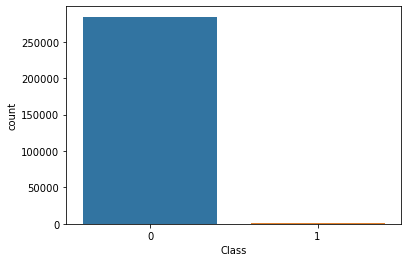

In [6]:
sns.countplot(Y)

In [7]:
print(X.shape,Y.shape)

(284807, 30) (284807,)


In [8]:

from imblearn.combine import SMOTETomek

from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib inline

<h3
    >SMOTETmek -- This is a method which basically combine and use both over sampling and under sampling technique for converting the imbalanced data to balanced data</h3>

SMOTETomek method is efficient under a small dataset, and the accuracy of personality recognition is improved by up to around 10%. The results are better than those of previous similar studies. The average accuracies of the plain text dataset and the non-plain text dataset are 75.34% and 78.78%, respectively. The average accuracies of the short text dataset and the long text dataset are 75.34% and 64.25%, respectively.


In [9]:
smote = SMOTETomek(sampling_strategy = 'minority',random_state = 101)

**Using the fit_sample method to convert the imbalanced data into balanced data**

In [10]:
X_new,Y_new = smote.fit_sample(X,Y)

<h3>Printing the balanced data shape which is X_new,Y_new <h3>

In [11]:
print(X_new.shape,Y_new.shape)

(567642, 30) (567642,)


Shuffling the data by using the shuffle method which is present in sklearn.utils

In [12]:
X_new,Y_new = shuffle(X_new,Y_new,random_state = 101)

<h2>Checking the fraud and correct card data samples and storing them into different lists. <h2>

In [13]:
fraud_card = X_new[Y_new == 1]
correct_card = X_new[Y_new == 0]

Printing the shape of fraud and correct card data

In [14]:
print(fraud_card.shape,correct_card.shape)

(283821, 30) (283821, 30)


<h3>Doing the Visualisation by using count plot to know count of fraud and non fraud samples present in imbalanced data</h3>

<AxesSubplot:xlabel='Class', ylabel='count'>

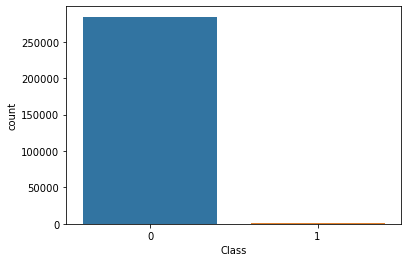

In [15]:
sns.countplot(Y)

<h3>Doing the Visualisation by using count plot to know count of fraud and non fraud samples present in imbalanced data</h3>



<AxesSubplot:xlabel='Class', ylabel='count'>

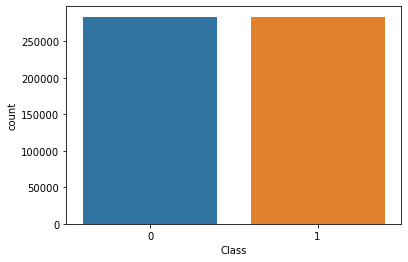

In [16]:
sns.countplot(Y_new)

Visualizing the correlation matrix of imbalanced data

<AxesSubplot:>

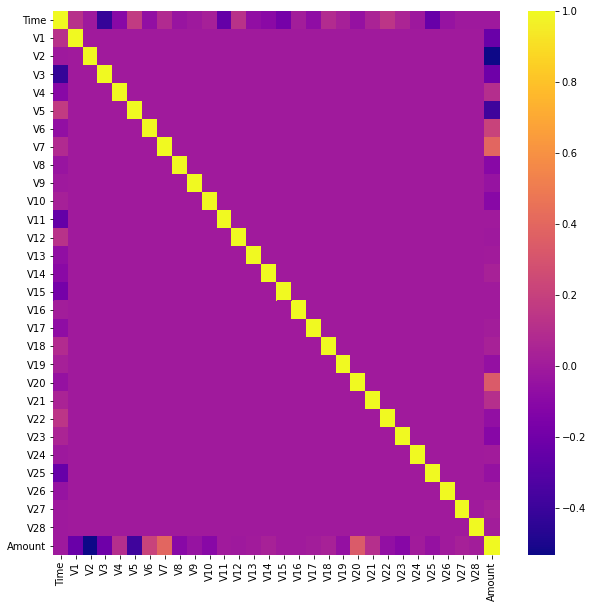

In [17]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(X.corr(),cmap='plasma')

Visualizing the correlation matrix of balanced data

<AxesSubplot:>

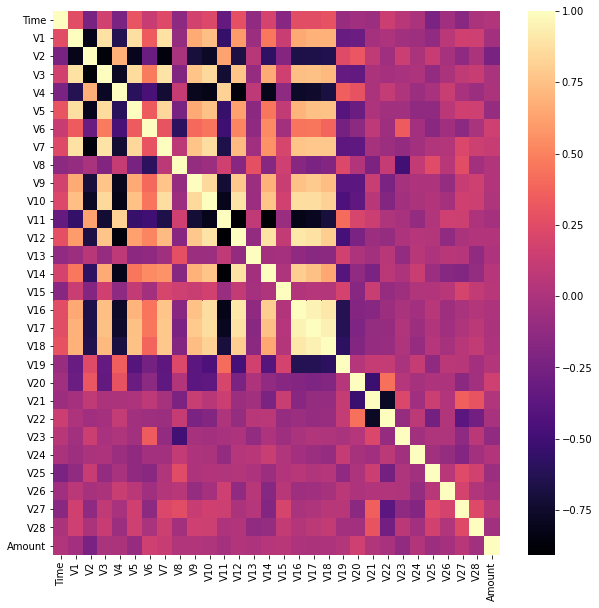

In [18]:
fig, ax = plt.subplots(figsize=(10,10))  
# sns.set_palette('coolwarm')
sns.heatmap(X_new.corr(),cmap='magma')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

Splitting the balanced data into training and testing set by using train_test_split method from sklearn.model_selection

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y_new,test_size=0.3,random_state = 101)

Printing the shapes of our new training and testing data

In [21]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(397349, 30) (397349,)
(170293, 30) (170293,)


<strong><h1>Modelling</h1></strong>

<h2>Now Let's Start Building Credit Card Fraud Detection model using Logistic regression<h2>
    
<p>Importing the Logistic Regression from sklearn.linear_models and then create the object of it namely model</p>

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
model = LogisticRegression()

Now Just Fit Your Model with training data by using fit method which takes imput as X and Y

In [23]:
model.fit(X_train,Y_train)

LogisticRegression()

Now Make Prediction by passing a testing data to the predict method

In [24]:
pred = model.predict(X_test)

Now Calculate and Print the Accuracy Score By passing actual label with the predict label to accuracy_score function that you can import from sklearn.metrics.

In [25]:
print(accuracy_score(Y_test,pred))

0.9577492909279888


<h2>Now We are going to plot confusion_matrix and classificaion report to check our model performance</h2>

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     84919
           1       0.97      0.95      0.96     85374

    accuracy                           0.96    170293
   macro avg       0.96      0.96      0.96    170293
weighted avg       0.96      0.96      0.96    170293



<AxesSubplot:>

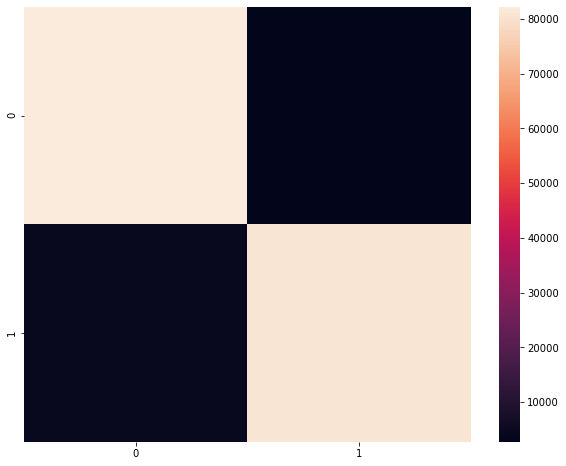

In [27]:
print(classification_report(Y_test,pred))


plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(Y_test,pred))

<h1>As We Will See We Have Got A Much Better Result But We Are Trying To Improve More By Testing Out Various Classification models on it to improve our accuracy</h1>

In [28]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error

<h3>Now we are going to make a function whose parameters are traing and testing data</h3>
<h3>First We Just form the list of tuples in which the tuples consist of two elements first one is Current Classifier Object aand Second is the Model Name</h3>
<h3>Then after that we are going devlop an list of tuples in which first element of tuple represents accuracy of the model , Second element of tuple represents classifier or model name, Third element represents mean_squared_error encountered in the current model </h3>
<h3>Then we just iterate through models list one by one and store the results in the accuracy_list and at the end return the accuracy_list</h3>

In [29]:
def check_various_classifiers(X_train,Y_train,X_test,Y_test):
    models = [  
            
            (ExtraTreesClassifier(),'ExtraTreesClassifier'),
            (GradientBoostingClassifier(),'GradientBoostingClassifier'),
            (RandomForestClassifier(),'RandomForestClassifier'),
            (RidgeClassifier(),'RidgeClassifier'),
            (SGDClassifier(),'SGDClassifier'),
            (LogisticRegression(),'LogisticRegression'),
            (AdaBoostClassifier(),'Ada Boost Classifier'),
            (xgb.XGBClassifier(),'XGBClassifier') 
    ]
    accuracy_list = []
    for (model,model_name) in models:
        curr_model = model
        curr_model.fit(X_train,Y_train)
        pred = curr_model.predict(X_test)
        acc = accuracy_score(Y_test,pred)
        err = mean_squared_error(Y_test,pred)
        accuracy_list.append((acc,model_name,err))
        print(str(acc) + ' '+ str(err))
    return accuracy_list
    

<h2>Now we are going to use our check_various_classifiers function by giving parameters as (X_train,Y_train) -> Training Data , (X_test,Y_test) -> Testing Data</h2>

In [30]:
accuracy_list = check_various_classifiers(X_train,Y_train,X_test,Y_test)

0.999847321968607 0.00015267803139295215
0.9873453400903149 0.012654659909685072
0.9998590664325604 0.00014093356743964813
0.9317881533592103 0.06821184664078969
0.8892790660802264 0.11072093391977357
0.9577492909279888 0.04225070907201118
0.9803045339503091 0.019695466049690826
0.9997885996488405 0.0002114003511594722


<h2>Now we are sorting our returned list on the basis of accuracy</h2>

In [33]:
accuracy_list.sort(reverse=True,key = lambda x:x[0])

<h3>Now we are going to display the final result in which we are printing the model_name along with it's accuracy and error.</h3>

In [34]:
model_names = []
accuracies = []
error = []
for (acc,model_name,err) in accuracy_list:
    
    model_names.append(model_name)
    
    accuracies.append(acc)
    
    error.append(err)

    
accuracy_list.sort(reverse=True,key = lambda x:x[0])

for (acc,model,loss) in accuracy_list:
    print('Accuracy of '+ str(model)+ ' '+str(acc)+' with loss of '+str(loss))
    print('')

Accuracy of RandomForestClassifier 0.9998590664325604 with loss of 0.00014093356743964813

Accuracy of ExtraTreesClassifier 0.999847321968607 with loss of 0.00015267803139295215

Accuracy of XGBClassifier 0.9997885996488405 with loss of 0.0002114003511594722

Accuracy of GradientBoostingClassifier 0.9873453400903149 with loss of 0.012654659909685072

Accuracy of Ada Boost Classifier 0.9803045339503091 with loss of 0.019695466049690826

Accuracy of LogisticRegression 0.9577492909279888 with loss of 0.04225070907201118

Accuracy of RidgeClassifier 0.9317881533592103 with loss of 0.06821184664078969

Accuracy of SGDClassifier 0.8892790660802264 with loss of 0.11072093391977357



<h2>Now We are going to display the accuracies along with its models using barplots and doing the visualization</h2>

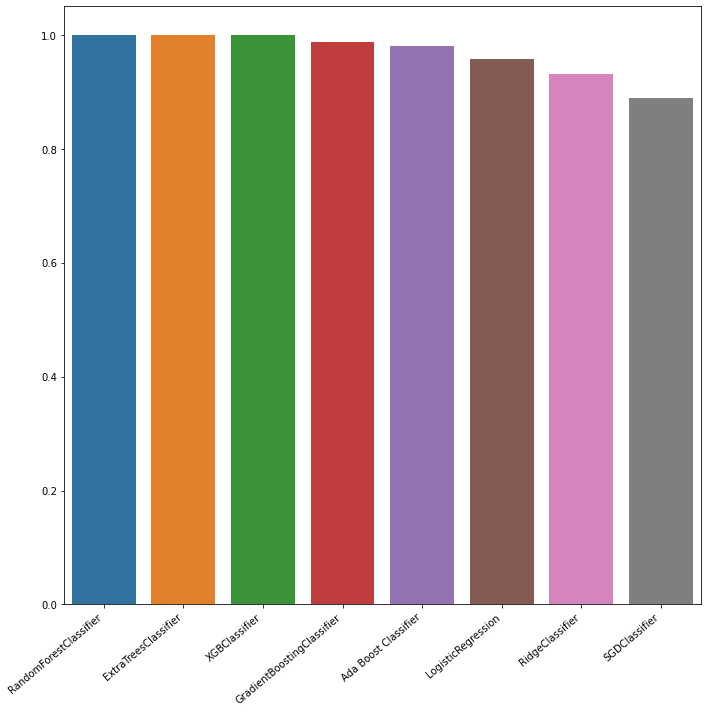

In [35]:
plt.figure(figsize=(10,10))
ax = sns.barplot(model_names,accuracies)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<h2>Now We are going to display the mean_squared_error along with its models using barplots in seaborn</h2>

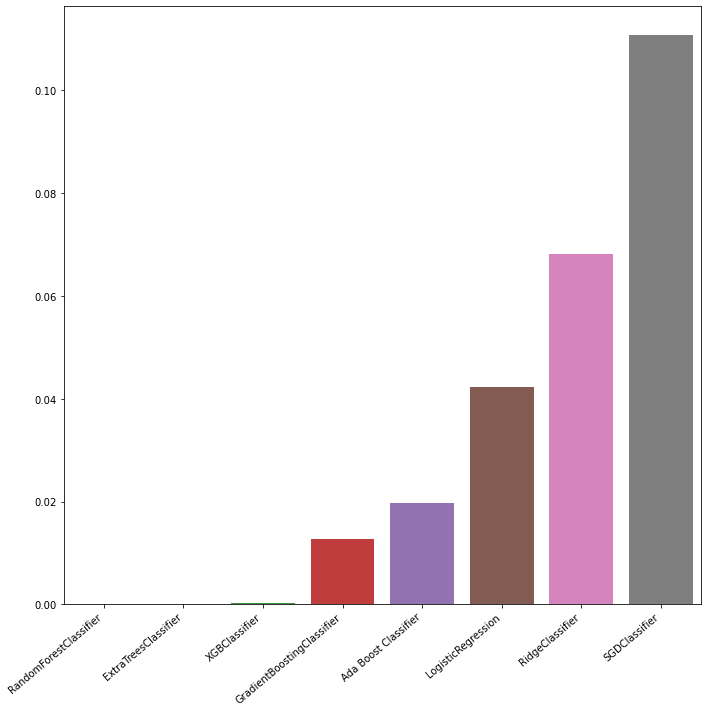

In [36]:
plt.figure(figsize=(10,10))
ax = sns.barplot(model_names,error)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<h2>By Doing The Visualization we can see that best classifier which gives high accuracy is ExtraTreesClassifier with the accuracy of 99.986% and with the loss of 0.0135%<h2>